In [2]:
import pandas as pd

# Load CSV with encoding specified
df = pd.read_csv("data/superstore.csv", encoding='ISO-8859-1')

# Check first few rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Quick check
df['Order Date'].head()

0   2016-11-08
1   2016-11-08
2   2016-06-12
3   2015-10-11
4   2015-10-11
Name: Order Date, dtype: datetime64[ns]

In [7]:
monthly_sales = df.resample('ME', on='Order Date')['Sales'].sum()

# Check first 5 months
monthly_sales.head()

Order Date
2014-01-31    14236.895
2014-02-28     4519.892
2014-03-31    55691.009
2014-04-30    28295.345
2014-05-31    23648.287
Freq: ME, Name: Sales, dtype: float64

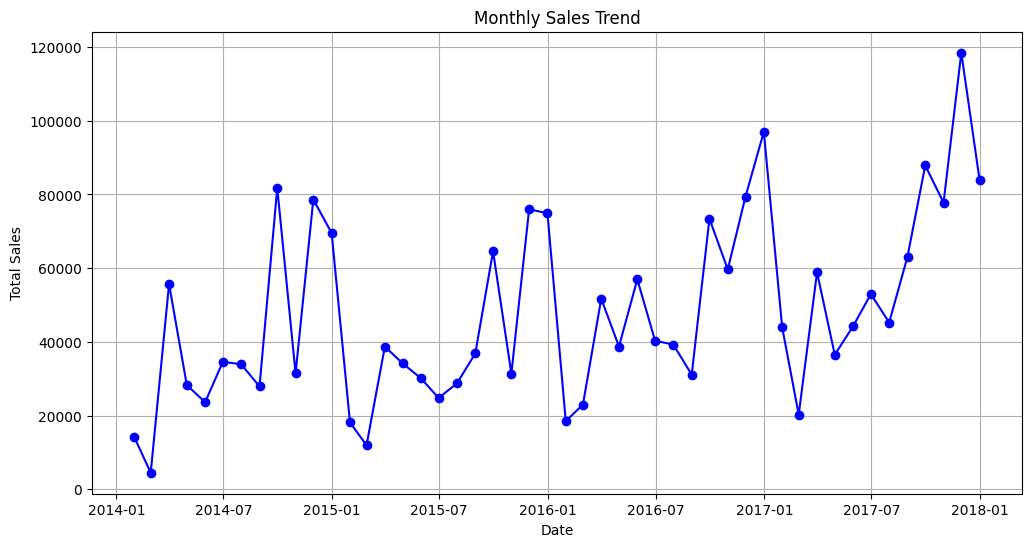

In [8]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='blue')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [9]:
monthly_df = monthly_sales.reset_index()
monthly_df['Month'] = np.arange(len(monthly_df))

# Define features and target
X = monthly_df[['Month']]
y = monthly_df['Sales']

# Initialize and train linear regression model
model = LinearRegression()
model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [10]:
# Forecast next 6 months
future_months = 6
last_month = monthly_df['Month'].iloc[-1]

future_X = pd.DataFrame({
    'Month': np.arange(last_month + 1, last_month + future_months + 1)
})

forecast = model.predict(future_X)
forecast

array([69957.53579787, 70859.54333018, 71761.55086249, 72663.55839481,
       73565.56592712, 74467.57345943])

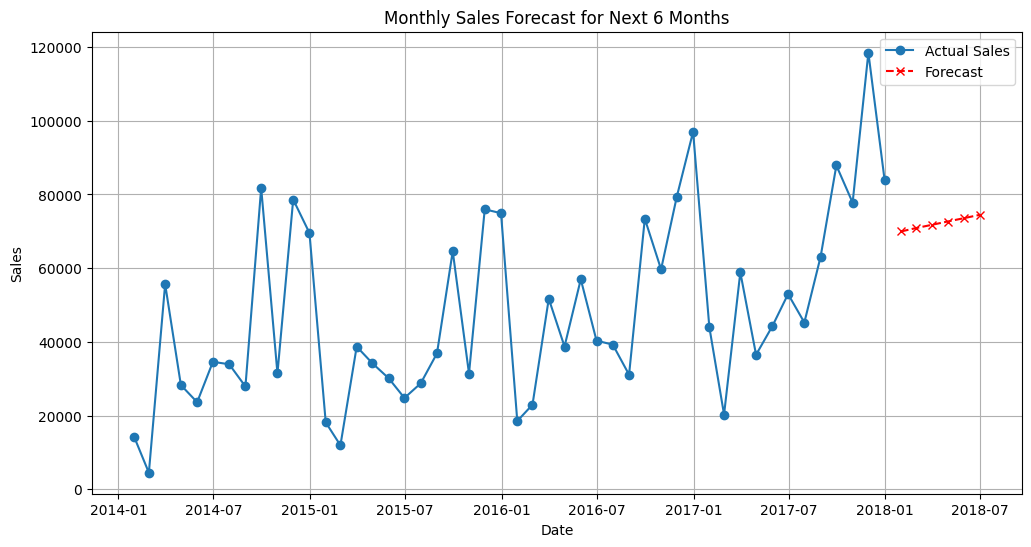

In [12]:
future_dates = pd.date_range(
    start=monthly_df['Order Date'].iloc[-1],
    periods=future_months + 1,
    freq='ME'
)[1:]

# Plot actual sales and forecast
plt.figure(figsize=(12,6))
plt.plot(monthly_df['Order Date'], monthly_df['Sales'], label='Actual Sales', marker='o')
plt.plot(future_dates, forecast, label='Forecast', marker='x', linestyle='--', color='red')
plt.title("Monthly Sales Forecast for Next 6 Months")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

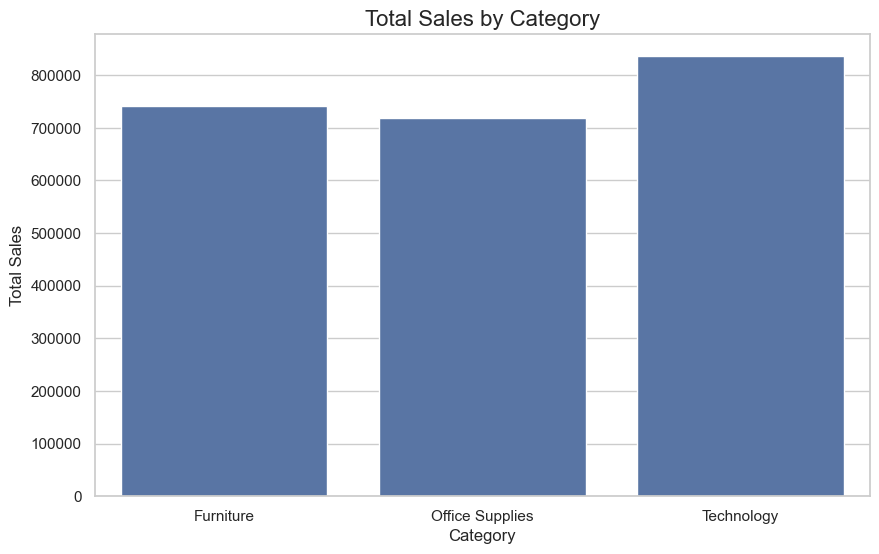

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

# Use errorbar=None instead of ci=None
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, errorbar=None)

plt.title('Total Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()